# **STAGE PONTS INSTRUMENTES - Notebook 11 Partie 1**


## Table of Contents

### 0. [Bibliothèques](#0/-Bibliothèques)
### I. [Estimation des poids dans le meilleur cas](#I/-Estimation-des-poids-dans-le-meilleur-cas)
### II. [Interpolation sur la LI pour les camions à 70km/h](#II/-Interpolation-sur-la-LI-pour-les-camions-à-70-km/h)
### III. [Lignes d'influence par vitesse](#III/-Lignes-d'influence-par-vitesse)
### IV. [Lignes d'influence interpolée selon la vitesse](#IV/-Ligne-d'influence-interpolée-selon-la-vitesse)



## 0/ Bibliothèques

In [1]:
from Bwifsttar import load_senlis_modified,calibration_mt_reg,estimation,compare_weights_mt,poids_tot,get_func_li,calibration_mt_amp
from Bwifsttar import estimation,compare_weights_mt
from Bwifsttar import gather_trucks,sort_trucks_speeds
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
from scipy.interpolate import interp1d


## I/ Estimation des poids dans le meilleur cas

**Pour voir quelles sont les meilleures résultats obtenues, il faut faire la calibration sur le camion sur lequel on fait la déconvolution**

Vitesse du camion ci dessous en km/h :  87.77157114453905


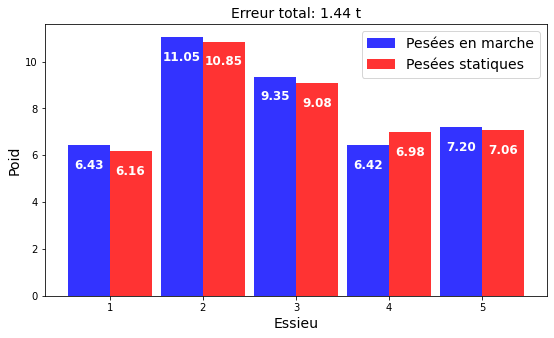

Poids total mesuré : 41.332608806344574
Poids total réel 40.14256
Vitesse du camion ci dessous en km/h :  83.78171675628467


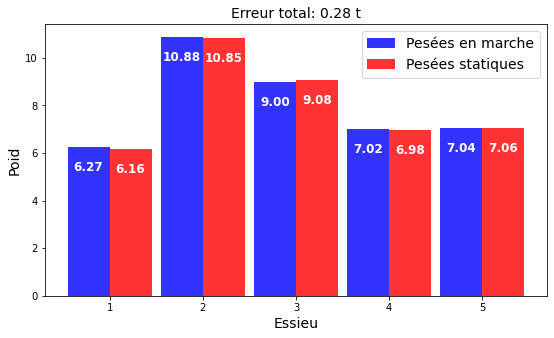

Poids total mesuré : 40.07292106360722
Poids total réel 40.14256
Vitesse du camion ci dessous en km/h :  85.07076923076924


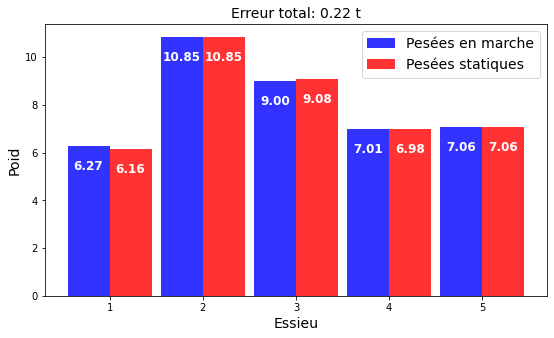

Poids total mesuré : 39.74409644595772
Poids total réel 40.14256
Vitesse du camion ci dessous en km/h :  86.40010485979856


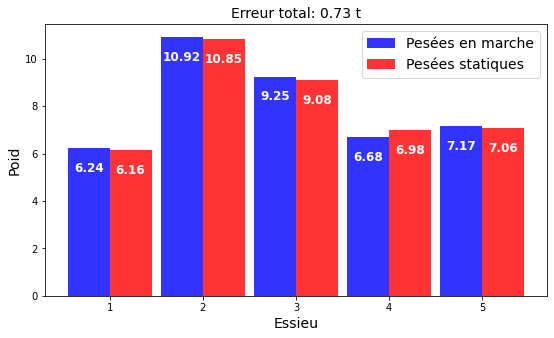

Poids total mesuré : 40.50062961977509
Poids total réel 40.14256
Vitesse du camion ci dessous en km/h :  77.8815673718719


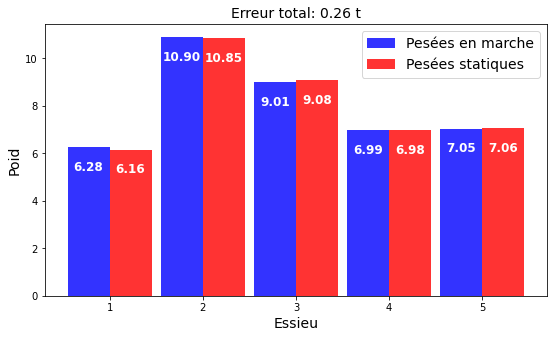

Poids total mesuré : 39.97349529818771
Poids total réel 40.14256
Vitesse du camion ci dessous en km/h :  85.07080338717712


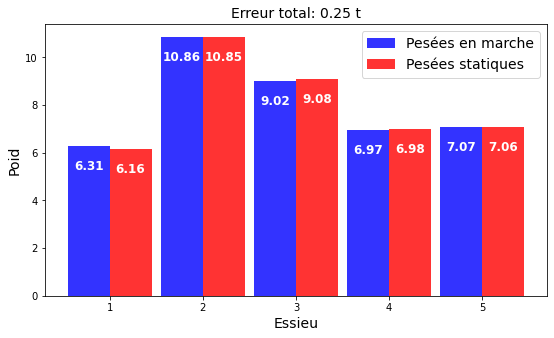

Poids total mesuré : 40.011768622793696
Poids total réel 40.14256
Vitesse du camion ci dessous en km/h :  67.4340806189077


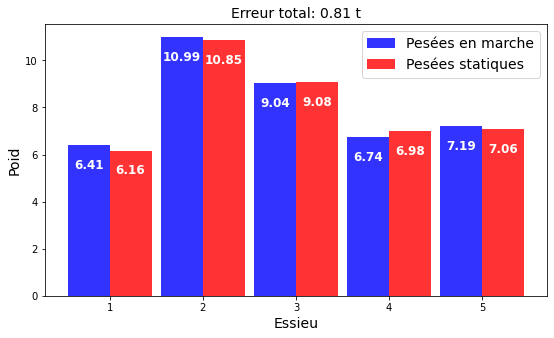

Poids total mesuré : 39.97097967708312
Poids total réel 40.14256
Vitesse du camion ci dessous en km/h :  68.2668670831572


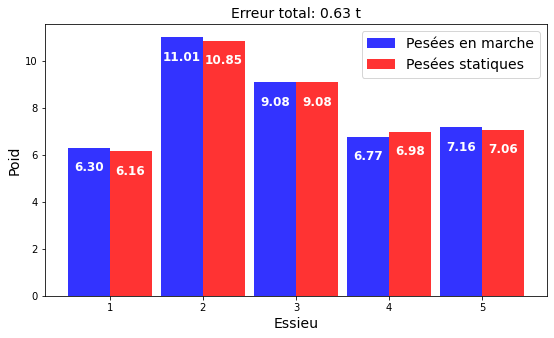

Poids total mesuré : 40.10494095105188
Poids total réel 40.14256
Vitesse du camion ci dessous en km/h :  66.62158940037331


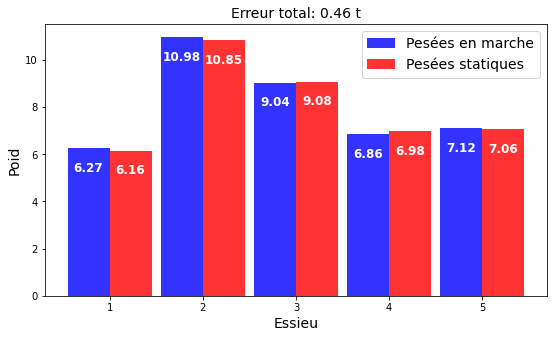

Poids total mesuré : 40.10023829945995
Poids total réel 40.14256
Vitesse du camion ci dessous en km/h :  76.8000296453673


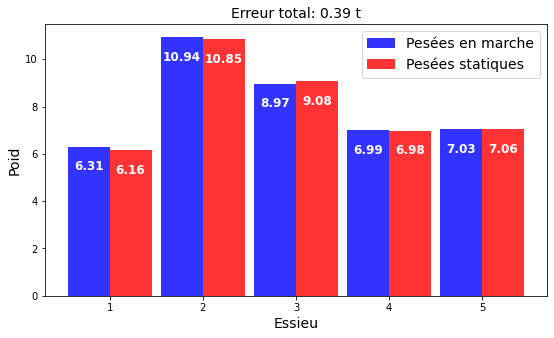

Poids total mesuré : 39.77703643583174
Poids total réel 40.14256
Vitesse du camion ci dessous en km/h :  68.26659159687523


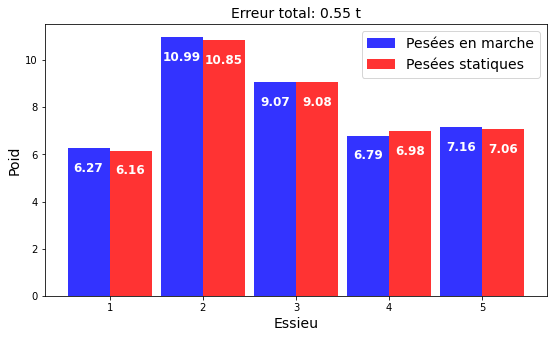

Poids total mesuré : 40.12373160875783
Poids total réel 40.14256


In [2]:

capteurs = [6]
calibration_trucks,traffic_trucks = load_senlis_modified(selected=6) #[3,4,6,7]
calibration_trucks = [truck for truck in calibration_trucks if(len(truck.weights) == len(truck.peaks))]

#h6_70 = lignes_influence_mt_speed(70,capteurs,tv_reg={'strength': 1e2, 'cutoff': 0.95})
#multi_viz_speed(70,h_6,capteurs)
#idx_70 = [0,2,5,7]
#h6_70 = h6_70[0]
#plt.plot(h6_70)

for i in range(len(calibration_trucks)):
    influence = calibration_mt_reg(calibration_trucks[i:i+1],l2_reg={'strength': 1e2, 'cutoff': 0.05})
    w = estimation(calibration_trucks[i], influence)
    compare_weights_mt(calibration_trucks[i:i+1],[w])
    print("Poids total mesuré :",poids_tot(calibration_trucks[i],influence))
    print("Poids total réel", np.sum(calibration_trucks[i].weights))



## II/ Interpolation sur la LI pour les camions à 70 km/h


**Nous avons vu dans d'autres Notebooks que les LI calculées par tranche de vitesse donnaient de meilleurs résultats (sur la reconstruction signal et pesée en marche).**

**Les meilleurs résultats étaient obtenus sur les camions à basse vitesse. Nous allons voir si l'interpolation des LI obtenues par les camions à 70km/h peut donner une bonne solution générale**

In [3]:
calibration_trucks,traffic_trucks = load_senlis_modified(selected=6) #[3,4,6,7]
trucks = [truck for truck in calibration_trucks if(len(truck.weights) == len(truck.peaks))]

list_speeds = []
list_infl = []

for i in range(len(trucks)):
    list_speeds.append(trucks[i].speed)
    list_infl.append(calibration_mt_amp(trucks[i:i+1],l2_reg={'strength': 1e3, 'cutoff': 0.01},tv_reg={'strength': 1e3, 'cutoff': 0.95}))
list_infl = np.array(list_infl)
list_speeds = np.array(list_speeds)

print(list_speeds.shape)
print(list_infl.shape)
    

Alphas finaux :  [0.99890583]
Alphas finaux :  [0.9999641]
Alphas finaux :  [0.99996182]
Alphas finaux :  [0.99963359]
Alphas finaux :  [0.99990538]
Alphas finaux :  [0.99988841]
Alphas finaux :  [0.999117]
Alphas finaux :  [0.9989945]
Alphas finaux :  [0.99927364]
Alphas finaux :  [0.99971983]
Alphas finaux :  [0.99904448]
(11,)
(11, 701)


In [4]:
func   = get_func_li(list_speeds, list_infl)#permet à partir de meters et infuence de trouver une approximation de influence = f(meters)
func(70).shape

(701,)

Vitesse du camion ci dessous en km/h :  85.07080338717712


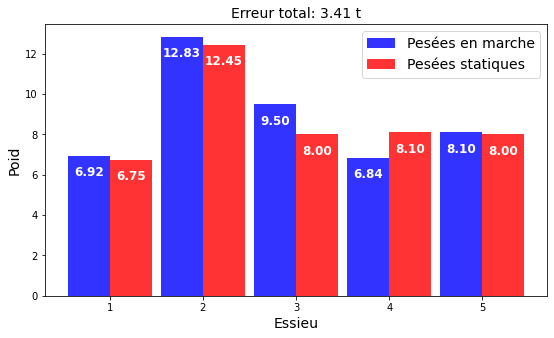

Vitesse du camion ci dessous en km/h :  86.39993000512


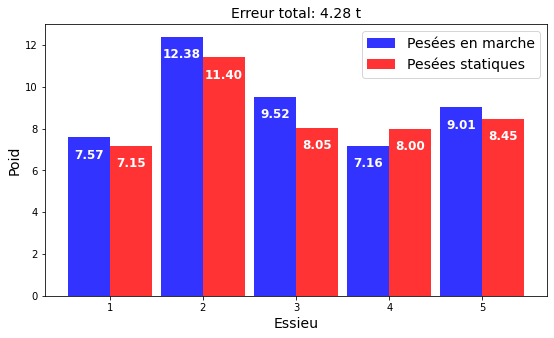

Vitesse du camion ci dessous en km/h :  85.07093916023571


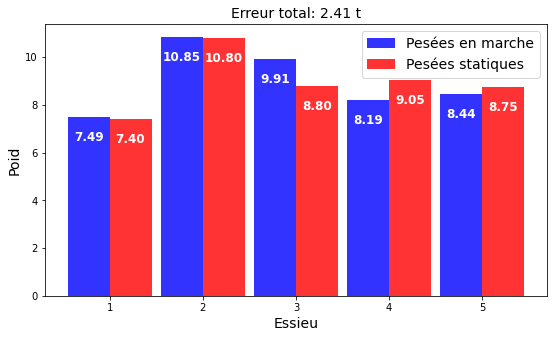

Vitesse du camion ci dessous en km/h :  90.64891764536495


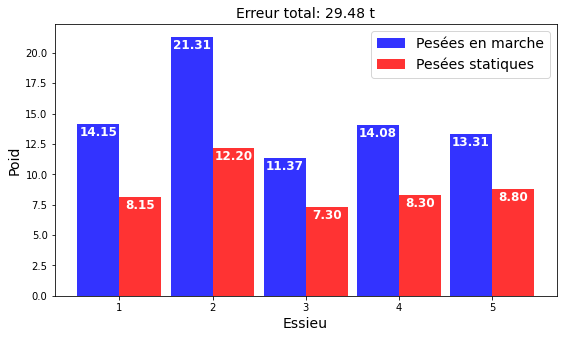

Vitesse du camion ci dessous en km/h :  80.13904542540847


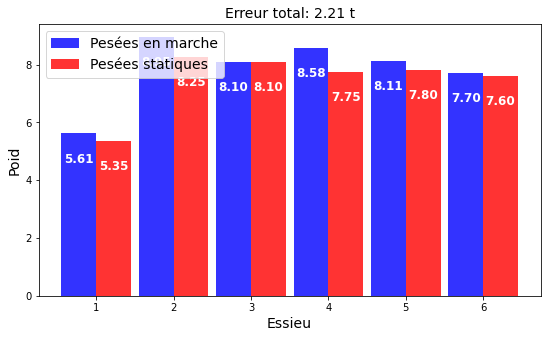

Vitesse du camion ci dessous en km/h :  80.13925313603143


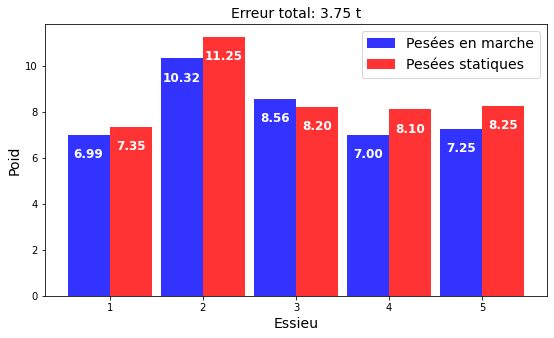

Vitesse du camion ci dessous en km/h :  86.4


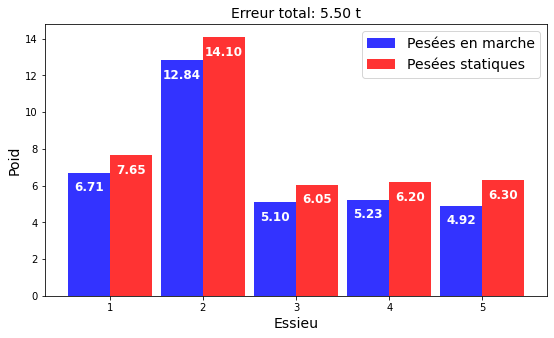

Vitesse du camion ci dessous en km/h :  86.40010485979856


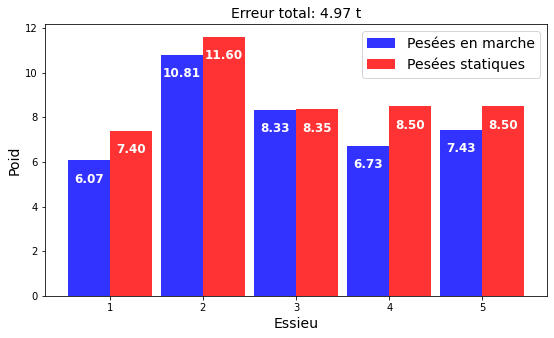

Vitesse du camion ci dessous en km/h :  87.77146453412851


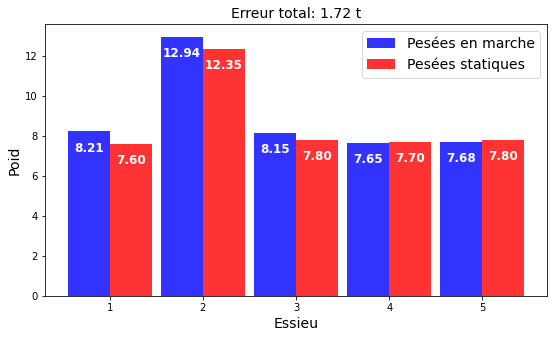

Vitesse du camion ci dessous en km/h :  83.78188710265076


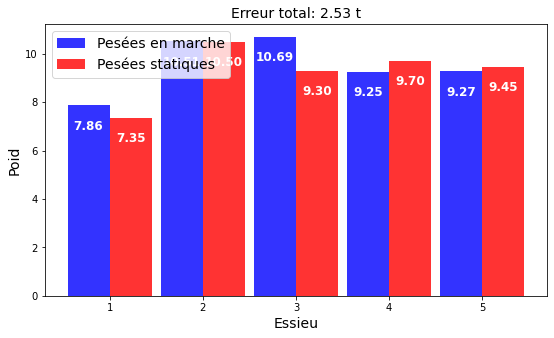

Vitesse du camion ci dessous en km/h :  86.40017258461441


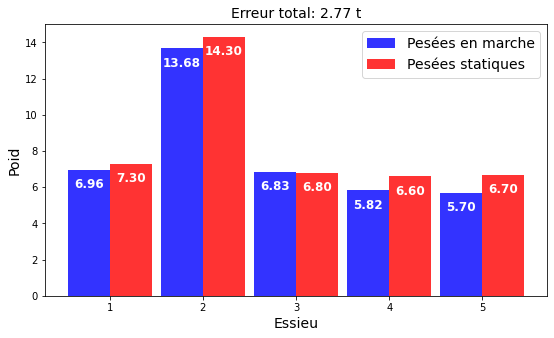

Vitesse du camion ci dessous en km/h :  87.77121416846268


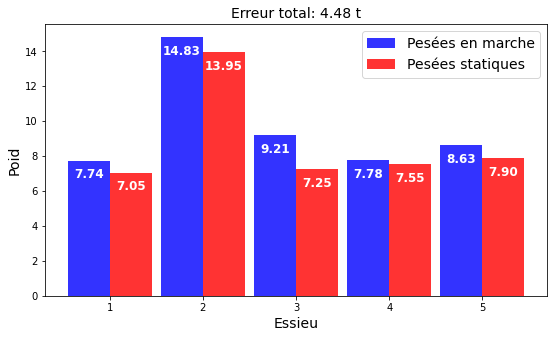

Vitesse du camion ci dessous en km/h :  85.07070031273355


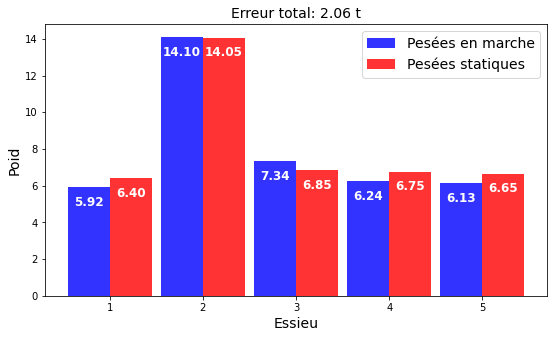

Vitesse du camion ci dessous en km/h :  83.78178479430743


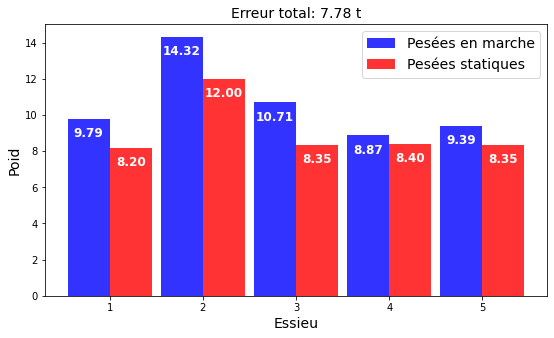

In [5]:
traffic_trucks = [truck for truck in traffic_trucks if(len(truck.weights) == len(truck.peaks))]

for i,truck in enumerate(traffic_trucks):
    infl = func(truck.speed)
    w = estimation(truck,infl)
    compare_weights_mt([truck],[w])

**Cette solution ne règle pas le problème de généralisation**

## III/ Lignes d'influence par vitesse

In [6]:
trucks70,trucks80,trucks90 = sort_trucks_speeds(calibration_trucks)

In [12]:
for truck in trucks70:
    print(truck.speed)

18.731689060807692
18.963018634210332
18.50599705565925
18.96294211024312


In [7]:
h6_70 = calibration_mt_amp(trucks70,l2_reg={'strength': 1e3, 'cutoff': 0.01},tv_reg={'strength': 1e3, 'cutoff': 0.95})
h6_80 = calibration_mt_amp(trucks80,l2_reg={'strength': 1e3, 'cutoff': 0.01},tv_reg={'strength': 1e3, 'cutoff': 0.95})
h6_90 = calibration_mt_amp(trucks90,l2_reg={'strength': 1e3, 'cutoff': 0.01},tv_reg={'strength': 1e3, 'cutoff': 0.95})


Alphas finaux :  [0.99996438 0.9999409  0.99989996 0.99989126]
Alphas finaux :  [0.99989624 0.99551999]
Alphas finaux :  [0.99993782 0.9998102  0.99901616 0.99946387 0.99923975]


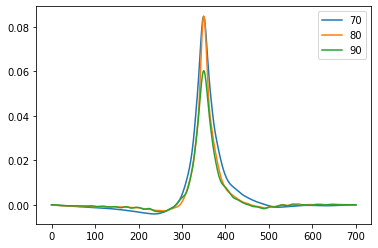

In [8]:
plt.figure()
plt.plot(h6_70,label='70')
plt.plot(h6_80,label='80')
plt.plot(h6_90,label='90')
plt.legend()
plt.show()

## IV/ Ligne d'influence interpolée selon la vitesse

In [9]:
list_infl,list_speeds,list_meters,list_times,list_signals = gather_trucks(calibration_trucks,traffic_trucks)
func =  get_func_li(list_speeds,list_infl)

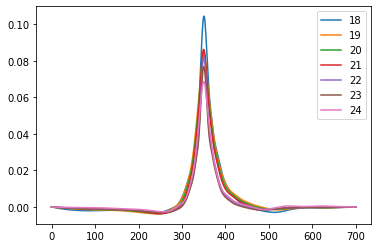

In [10]:
plt.figure()
for i in [x for x in np.arange(18,25,1)]:
    #print(i)
    plt.plot(func(i),label=i)
    plt.legend()
plt.show()